# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
### Not for Grading

## Learning Objectives
At the end of the experiment, participants will be able to :
* decompose a matrix into eigenvalues and eigenvectors
* understand explained variance ratio
* understand & implement the  PCA
* use PCA for dimensionality reduction of image data

#### Importing Required Packages

In [21]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

### Loading Hypothetical 3D dataset : 'X_PCA_data.npy' for experimenting PCA theories

In [2]:
X=np.load('X_PCA_data.npy')

In [ ]:
X

In [4]:
X.shape

(60, 3)

In [ ]:
## plotting  our 3D data :>   X
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1],X[:,2])

### Linear Algebra --> Using SVD decomposition: Singular Value Decomposition**

In [ ]:
X_centered = X - X.mean(axis=0) ## don't forget to center the data if you are implement PCA yourself/sklearn take care itself
X_centered

In [7]:
U, s, Vt = np.linalg.svd(X_centered)

In [8]:
print(U.shape) # X-(60,3) : x X x.T --> (60,3) x(3,60) ## three sample and 60 feature
print(s.shape)
print(Vt.shape) # x.T  X x --> (3,60) X (60,3)  ## 60  sample and 3 feature

(60, 60)
(3,)
(3, 3)


In [11]:
X2D = X_centered.dot( Vt.T[:, :2] ) # choosing two principal components
X2D.shape

(60, 2)

### Understanding Explained Variance Ratio

In [12]:
s # sigma matrix

array([6.77645005, 2.82403671, 0.78116597])

In [13]:
print(np.square(s))
print(np.square(s).sum())

[45.92027533  7.97518336  0.61022027]
54.50567895729197


In [14]:
## Explained Variance Ratio
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

## Working with image data
### Loading Data
Using SciKit-Learns ```fetch_openml``` to load MNIST data.

In [15]:
mnist = fetch_openml('mnist_784', parser='auto',cache=False)

Understanding the data:

In [16]:
print('Data Shape :',mnist.data.shape,'\n')
print('Keys : ',mnist.keys(),'\n')
print('Description :', mnist.DESCR)

Data Shape : (70000, 784) 

Keys :  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']) 

Description : **Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio.

Separating features and targets

In [17]:
X, y = mnist["data"].values, mnist["target"].values
print(X.shape)
# Try running given below codes in new cells
# mnist["data"].info()
# mnist["data"].info()

(70000, 784)


Visualizing the data set

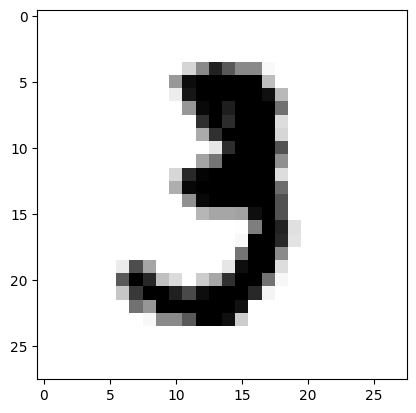

In [24]:
sample_digit = X[10] # Check the result by putting different values in square bracket
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

Checking the corresponding label & converting the data type

In [25]:
print(y[10])
print(type(y[10]))
y = y.astype(np.uint8)
print(type(y[90]))


3
<class 'numpy.uint8'>
<class 'numpy.uint8'>


#### Train Test Split

In [22]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# We can use 'train_test_split' as given below :
# X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Applying PCA and reducing the number of features

In [23]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum( pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

Understanding each syntax by running in individual cells

In [ ]:
pca.explained_variance_ratio_

In [ ]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

#### Visualizing the cumsum

Total number of features : 784 



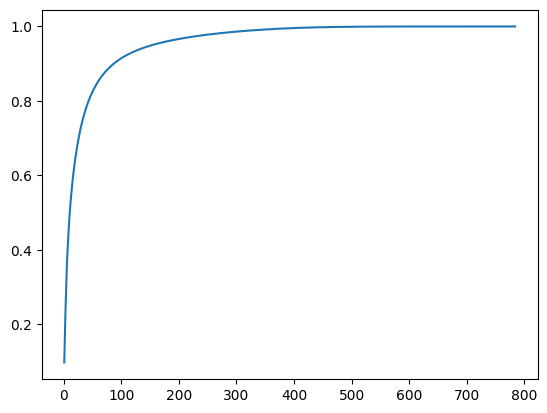

In [27]:
n=len(cumsum)
print('Total number of features :', n,'\n')
xx=np.arange(1,n+1)
plt.plot(xx,cumsum)

#### Reducing the features of Training data using PCA

In [28]:
pca=PCA(n_components=154)
X_train_reduced=pca.fit_transform(X_train)

In [29]:
X_train_reduced.shape

(60000, 154)

#### Similarly reducing the features of Test data using PCA

In [30]:
X_test_reduced=pca.fit_transform(X_test) # transform only

### Transform data back to its original space.
#### Reducing feature of X_train using PCA:

In [31]:
pca=PCA(n_components=154)
X_reduced=pca.fit_transform(X_train)

In [32]:
X_reduced.shape

(60000, 154)

#### Recovering back the features of X_reduced:

In [33]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(60000, 784)

### Visualizing and comparing with original data:
* Recovered sample image

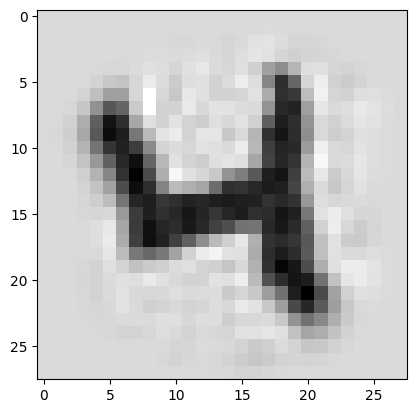

In [34]:
sample_digit = X_recovered[20]
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

* Original sample image

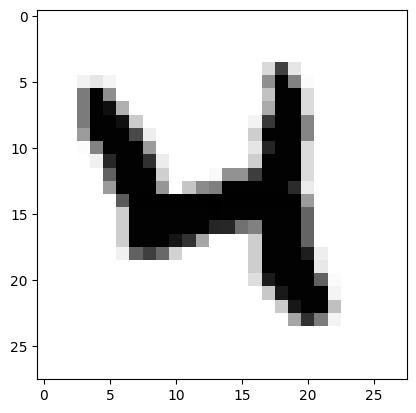

In [35]:
sample_digit = X_train[20]
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

# Calculate compression ratio

In [28]:
pca.components_.shape

(154, 784)

In [29]:
n_components=154
original_size = 784
total_sample =60000

In [30]:
# Unique value required to store origial dataset
U_o=total_sample*original_size
# Unique value after PCA
U_p = total_sample*n_components

We need to store the template to reconstruct the image later. Therefore we also need to store unique values for . template  

In [31]:
U_t= n_components * original_size # (784 =28*28)

In [32]:
#Total unique value after PCA
U_pt = U_p + U_t

In [33]:
# % compression = (U. value for original data - U. value after PCA considering tempalte) / U. value for original data
compression_ratio = ((U_o-U_pt)/U_o )*100
compression_ratio

80.10047619047619